In [243]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score

In [150]:
df = pd.read_csv('athletes.csv')
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [154]:
print(df.isnull().sum())

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64


In [156]:
df = df.dropna(subset=['dob'])
imputer_height = SimpleImputer(strategy='median')
imputer_weight = SimpleImputer(strategy='mean')  

df['height'] = imputer_height.fit_transform(df[['height']])
df['weight'] = imputer_weight.fit_transform(df[['weight']])


print(df.isnull().sum())
df.info()

id             0
name           0
nationality    0
sex            0
dob            0
height         0
weight         0
sport          0
gold           0
silver         0
bronze         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 11537 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11537 non-null  int64  
 1   name         11537 non-null  object 
 2   nationality  11537 non-null  object 
 3   sex          11537 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11537 non-null  float64
 6   weight       11537 non-null  float64
 7   sport        11537 non-null  object 
 8   gold         11537 non-null  int64  
 9   silver       11537 non-null  int64  
 10  bronze       11537 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1.1+ MB


In [158]:
df.drop(['name', 'id', 'dob'], axis=1, inplace=True)

In [160]:
label_encoder = LabelEncoder()
df['nationality'] = label_encoder.fit_transform(df['nationality'])
df['sport'] = label_encoder.fit_transform(df['sport'])
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

In [164]:
numeric_columns = ['height', 'weight', 'gold', 'silver', 'bronze', 'nationality', 'sport']
df_numeric = df[numeric_columns + ['sex']]
print(df_numeric.head())

   height  weight  gold  silver  bronze  nationality  sport  sex
0    1.72    64.0     0       0       0           59      2    1
1    1.68    56.0     0       0       0          102      9    0
2    1.98    79.0     0       0       1           33      2    1
3    1.83    80.0     0       0       0          119     22    1
4    1.81    71.0     0       0       0          141      7    1


In [168]:
X = df.drop(columns=['sex'])  
y = df['sex']  

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [180]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [188]:
model = LogisticRegression()

In [192]:
model.fit(X_train, y_train)

C:\Users\svshi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [210]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba(X_test)
for predicted_prob, actual in zip(predictions[:, 1], y_test):
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0

    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1

    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [212]:
tp, fp, fn, tn

(988, 261, 275, 784)

In [196]:
from sklearn.metrics import roc_curve

In [218]:
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])

In [220]:
for line in zip(fpr[:10], tpr[:10], thres[:10]):
    print(line)

(0.0, 0.0, inf)
(0.0, 0.000791765637371338, 0.9999534193089952)
(0.0, 0.014251781472684086, 0.9974195378661584)
(0.0009569377990430622, 0.014251781472684086, 0.9973849139373825)
(0.0009569377990430622, 0.0625494853523357, 0.9793374009894776)
(0.0019138755980861245, 0.0625494853523357, 0.9793227249089314)
(0.0019138755980861245, 0.06492478226444973, 0.9788672700839297)
(0.0028708133971291866, 0.06492478226444973, 0.9786608844134826)
(0.0028708133971291866, 0.08155186064924783, 0.9733872176667557)
(0.003827751196172249, 0.08155186064924783, 0.9726160302669264)


In [223]:
import matplotlib.pyplot as plt

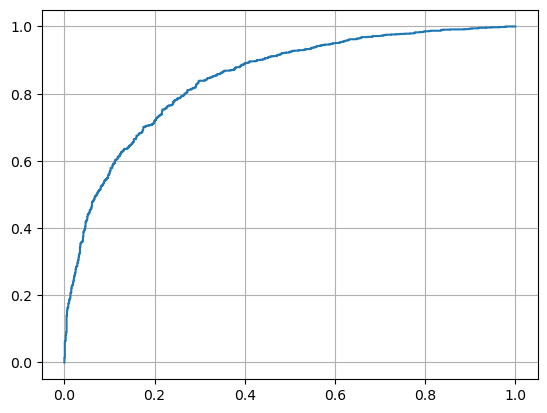

In [225]:
plt.plot(fpr, tpr)
plt.grid()

In [227]:
from sklearn.metrics import roc_auc_score

In [231]:
roc_auc_score(y_test, predictions[:, 1])

0.8452799024120439

In [237]:
if tp + fn > 0:
    TPR = tp / (tp + fn)  
else:
    TPR = 0

if fp + tn > 0:
    FPR = fp / (fp + tn)  # Fall-out
else:
    FPR = 0

print(f'TPR : {TPR:.4f}')
print(f'FPR : {FPR:.4f}')

TPR : 0.7823
FPR : 0.2498


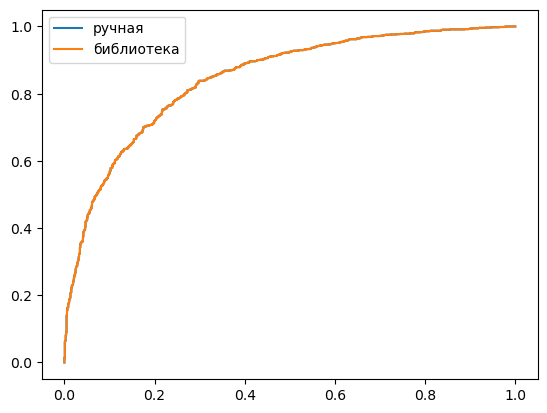

In [241]:
plt.plot(fpr, tpr, label='ручная' )
plt.plot(fpr, tpr , label='библиотека')
plt.grid()
plt.legend(loc=0)
plt.grid()
plt.show()

графики одинаковые

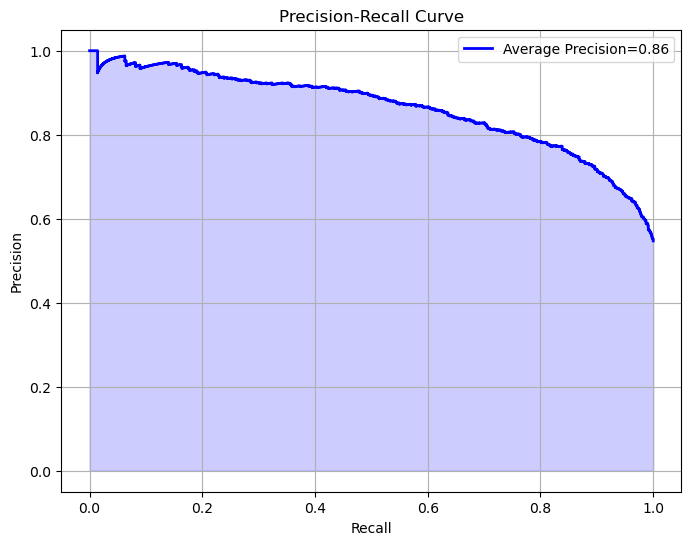

In [245]:
# Вычисляем Precision и Recall для различных пороговых значений
precision, recall, _ = precision_recall_curve(y_test, predictions[:, 1])
average_precision = average_precision_score(y_test, predictions[:, 1])

# График Precision-Recall
plt.figure(figsize=(8, 6))
plt.step(recall, precision, where='post', color="blue", linewidth=2, label=f'Average Precision={average_precision:.2f}')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')  # Заливка области под кривой
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

Модель показала хорошие результаты:

Высокий уровень обнаружения положительных примеров (TPR=0.7823).
Умеренно низкий уровень ложных срабатываний (FPR=0.2498).
Средняя точность (Average Precision) составляет около 86%, что подтверждает сильные общие характеристики модели.
Тем не менее, стоит учитывать:

Хотя средняя точность высока, модель демонстрирует низкую начальную точность при высоком покрытии, что может указывать на наличие некоторых сложных областей классификации.
